<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#add your code
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
dataset.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(dataset)

4857377

# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



The target column is Weighted_Price column it represents the VWAP- Volume Weighted Average Price. It is a measure of the average trading price for the period. VWAP is often used as a trading benchmark by investors who aim to be as passive as possible in their execution. The aim of using a VWAP trading target is to ensure that the trader executing the order does so in line with the volume on the market. VWAP is often used in algorithmic trading.


Visualize the target column

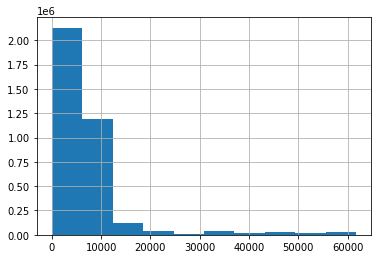

In [5]:
#add your code
dataset['Weighted_Price'].hist()

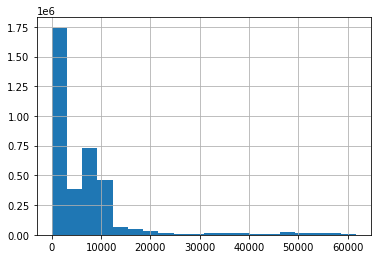

In [6]:
dataset['Weighted_Price'].hist(bins=20)

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [7]:
#add your code
missing_values_count = dataset.isnull().sum()
missing_values_count

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [8]:
missing_values_percentage = 100 * missing_values_count / len(dataset)
missing_values_percentage

Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64

Visualize the missing values using Missingno library

In [9]:
#add your code
import missingno as msno

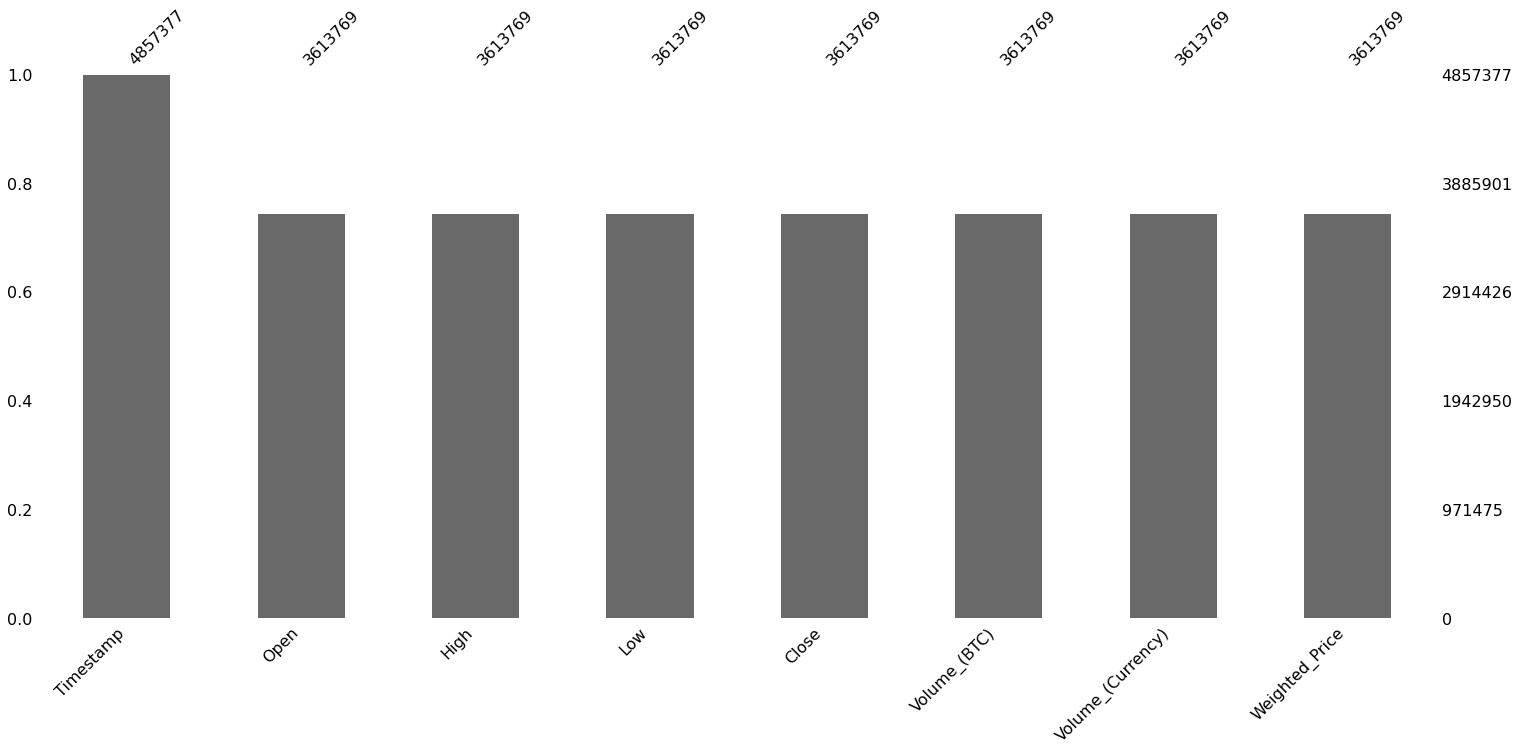

In [10]:
msno.bar(dataset)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

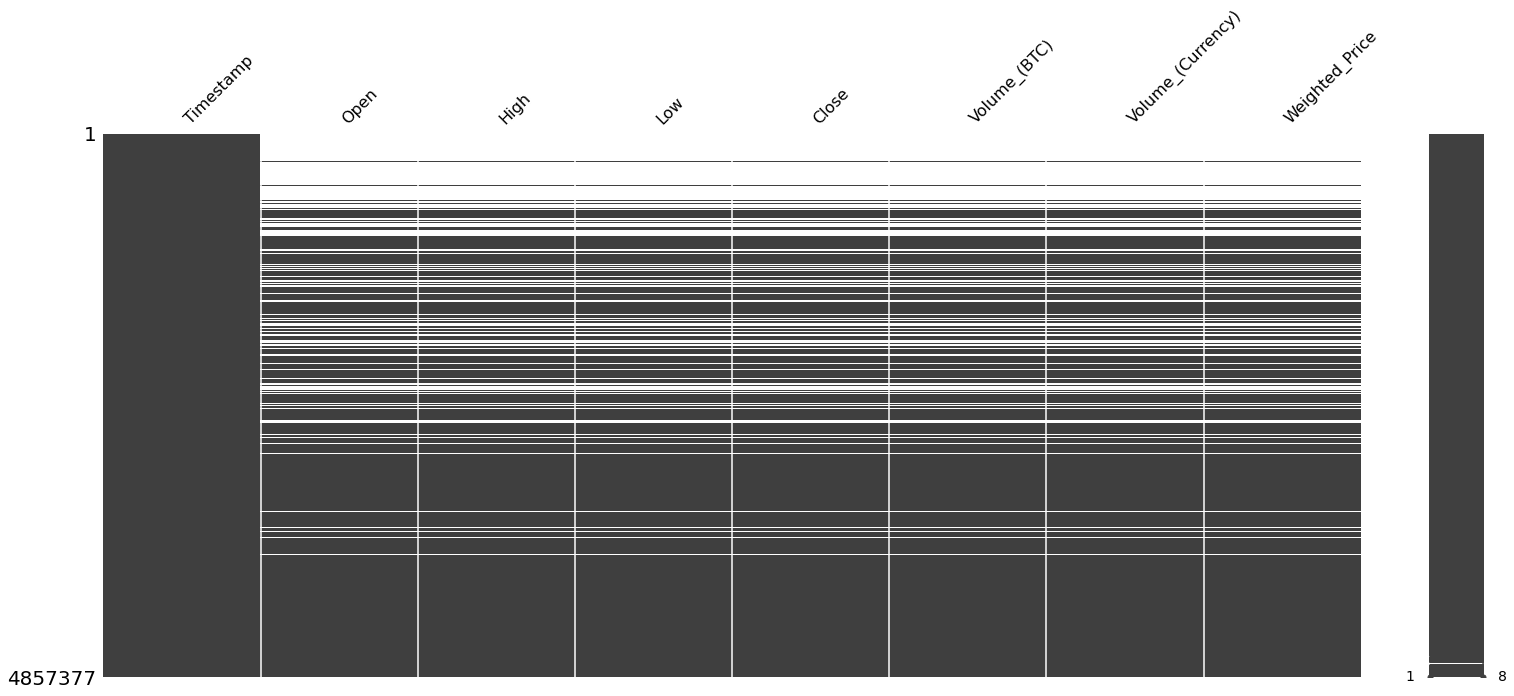

In [11]:
msno.matrix(dataset)

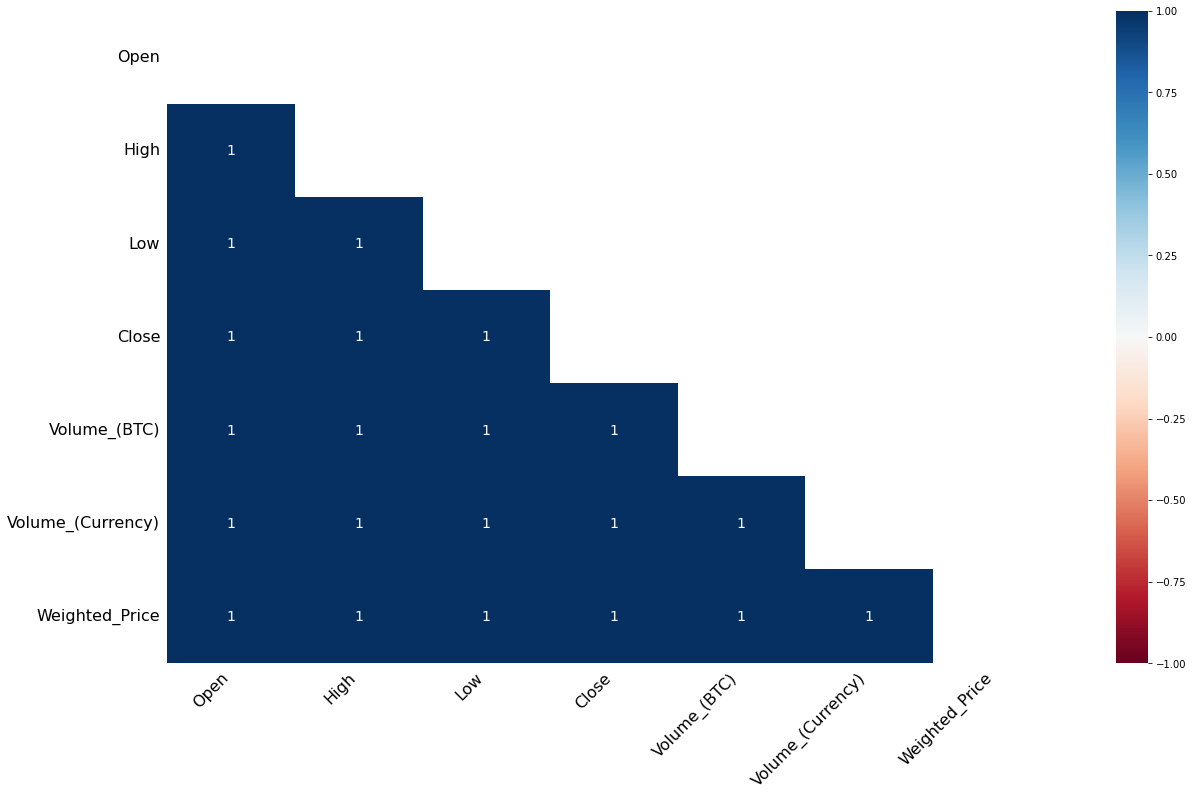

In [12]:
msno.heatmap(dataset)

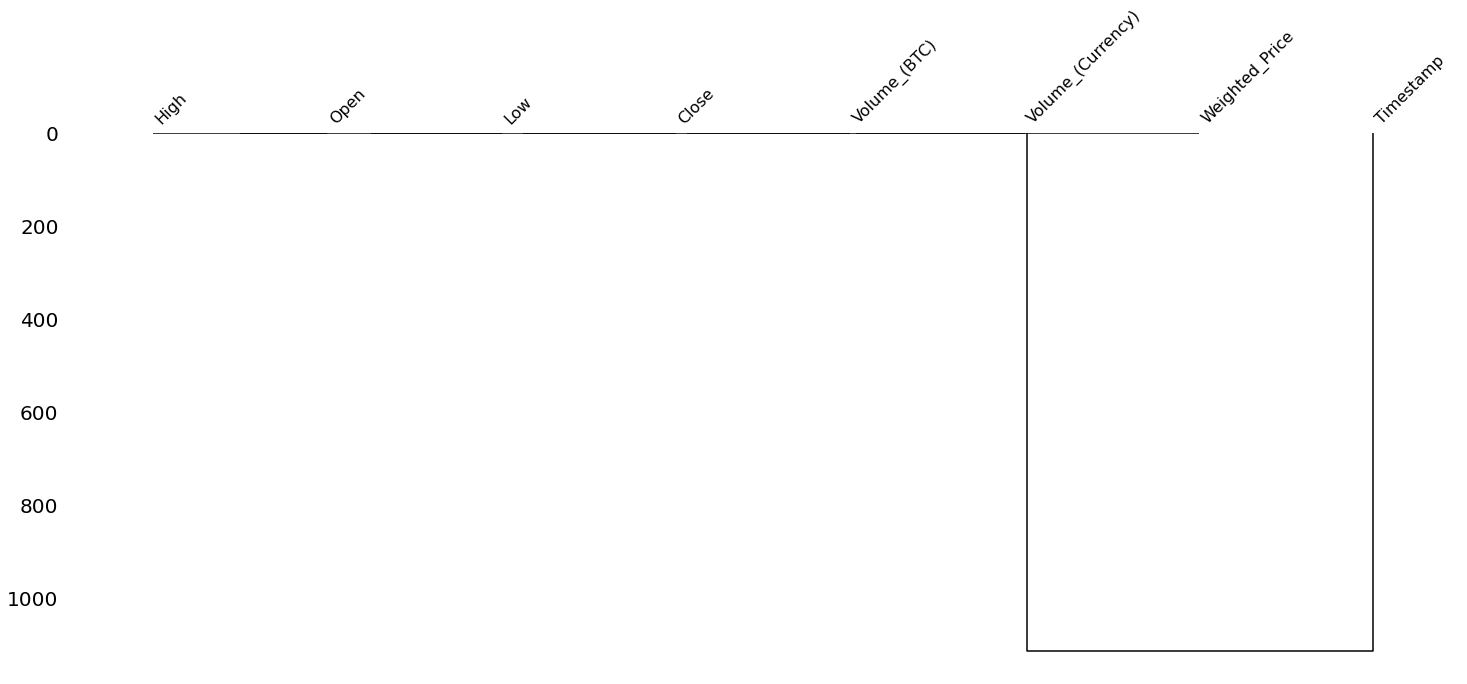

In [13]:
msno.dendrogram(dataset)

Write the reasons for the missing values

Each column expect the timestamp has exacly the same number of missing values and in the same rows. That means that in the data set we have rows that have no missing values and rows that have only value for timestamp and missing values for the other columns. The reason for the missing values could be no gathered informaions for the bitcoin in the specific timestamp.

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [14]:
#add your code
# this data is a time series so we will use linear interpolation to inpute the missing values
dataset_new = dataset.copy()
dataset_new.interpolate(limit_direction='both', inplace=True)

In [15]:
dataset_new.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

In [16]:
#add your code
#There are no non numerical values in the dataset

# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [17]:
#add your code
dataset_new.to_csv('/content/drive/MyDrive/Colab Notebooks/bitstamp_new_dataset.csv', index=False)

Print the first rows of your final Dataset

In [18]:
#add your code
dataset_new.head(100)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39
...,...,...,...,...,...,...,...,...
95,1325323620,4.39,4.39,4.39,4.39,9.904786,43.482008,4.39
96,1325323680,4.39,4.39,4.39,4.39,10.004251,43.918661,4.39
97,1325323740,4.39,4.39,4.39,4.39,10.103716,44.355314,4.39
98,1325323800,4.39,4.39,4.39,4.39,10.203181,44.791967,4.39


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [19]:
#add your code
dataset_new.median()

Timestamp            1.471428e+09
Open                 6.996000e+02
High                 6.999800e+02
Low                  6.991100e+02
Close                6.995850e+02
Volume_(BTC)         2.213777e+00
Volume_(Currency)    1.425636e+03
Weighted_Price       6.995569e+02
dtype: float64

In [20]:
dataset_new.mean()

Timestamp            1.471301e+09
Open                 4.591960e+03
High                 4.595217e+03
Low                  4.588553e+03
Close                4.591953e+03
Volume_(BTC)         9.535767e+00
Volume_(Currency)    3.143356e+04
Weighted_Price       4.591894e+03
dtype: float64

In [21]:
dataset_new.std()

Timestamp            8.428019e+07
Open                 8.157752e+03
High                 8.164283e+03
Low                  8.151038e+03
Close                8.157843e+03
Volume_(BTC)         2.979570e+01
Volume_(Currency)    1.321901e+05
Weighted_Price       8.157532e+03
dtype: float64

In [22]:
dataset_new.min()

Timestamp            1.325318e+09
Open                 3.800000e+00
High                 3.800000e+00
Low                  1.500000e+00
Close                1.500000e+00
Volume_(BTC)         0.000000e+00
Volume_(Currency)    0.000000e+00
Weighted_Price       3.800000e+00
dtype: float64

In [23]:
dataset_new.max()

Timestamp            1.617149e+09
Open                 6.176356e+04
High                 6.178183e+04
Low                  6.167355e+04
Close                6.178180e+04
Volume_(BTC)         5.853852e+03
Volume_(Currency)    1.390067e+07
Weighted_Price       6.171621e+04
dtype: float64

In [24]:
dataset_new.quantile([.1, .25, .5, .75, 1], axis=0)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0.10,1.354462e+09,12.8589,12.861667,12.855622,12.860,0.105749,4.071994e+01,12.860000
0.25,1.398179e+09,245.0500,245.150000,244.990000,245.040,0.500000,1.721672e+02,245.043016
0.50,1.471428e+09,699.6000,699.980000,699.110000,699.585,2.213777,1.425636e+03,699.556856
0.75,1.544288e+09,7235.2700,7239.690000,7230.770000,7235.570,8.006946,1.414915e+04,7235.224060
1.00,1.617149e+09,61763.5600,61781.830000,61673.550000,61781.800,5853.852166,1.390067e+07,61716.205341


In [25]:
from scipy import stats
stats.gmean(dataset_new)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


array([1.46888150e+09, 8.43896427e+02, 8.44367272e+02, 8.43380962e+02,
       8.43878949e+02, 0.00000000e+00, 0.00000000e+00, 8.43870008e+02])

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [26]:
# no categorical variables

In [27]:
#add your code

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


I coosed Volume_(BTC) and Weighted_Price

**Make the visualizations using histograms, bar charts, etc.**

In [28]:
volume=dataset_new['Volume_(BTC)']
VWAP = dataset_new['Weighted_Price']

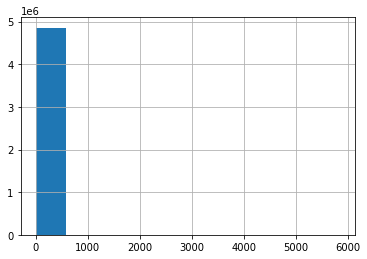

In [29]:
volume.hist()

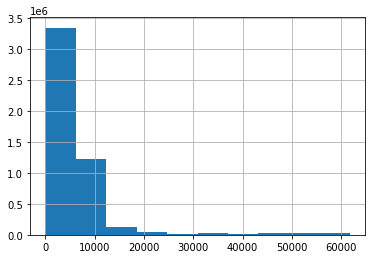

In [30]:
VWAP.hist()

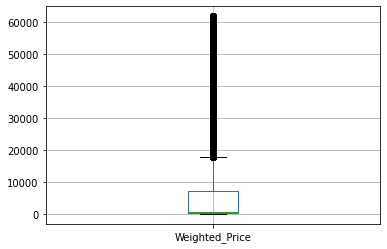

In [31]:
dataset_new.boxplot(column=['Weighted_Price'])  

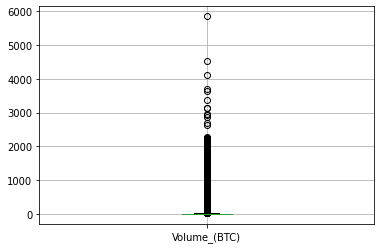

In [32]:
dataset_new.boxplot(column=['Volume_(BTC)'])  


Add as many codeboxes as you need

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

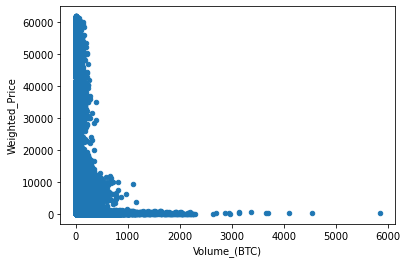

In [33]:
dataset_new.plot.scatter(x='Volume_(BTC)', y='Weighted_Price')

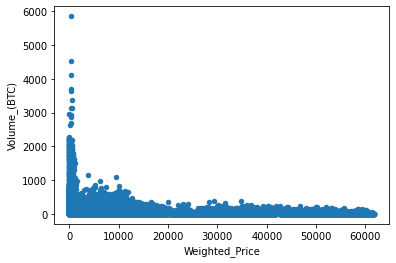

In [34]:
#add your code 
dataset_new.plot.scatter(y='Volume_(BTC)', x='Weighted_Price')

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 

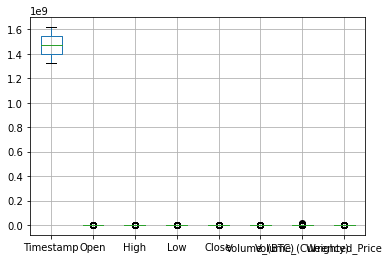

In [36]:
#add your code 
dataset_new.boxplot() 

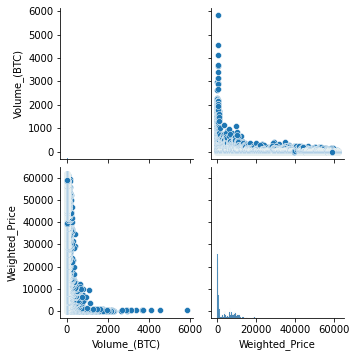

In [37]:
sns.pairplot(dataset_new,vars=['Volume_(BTC)', 'Weighted_Price'])

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash

